In [3]:
# Start writing code here...
import pandas as pd

In [4]:
data = pd.read_csv('Jane_street_Market_prediction.csv')
data


,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_115,feature_117,feature_118,feature_120,feature_121,feature_123,weight,resp
0,0,1,0.792400,-0.723451,1.294227,-0.141321,-0.079981,1.375387,0.647249,2.678173,...,-0.940243,-0.965462,-1.194845,-2.648614,-1.586816,4.306233,0.374031,1.906645,0.278052,0
1,1,1,-0.024133,0.528951,0.321622,0.753859,0.963181,-0.124053,-0.096336,-0.419206,...,-0.112219,0.786155,-0.215503,-1.693392,-0.630142,-0.019032,-0.595686,-2.074838,0.120731,0
2,2,-1,-1.586505,-0.947146,0.389981,-0.521926,-0.851833,-0.043166,0.186991,-1.675360,...,-0.106505,-0.401293,0.373660,0.096239,-0.073542,-1.737092,-2.198262,-1.895877,6.578355,1
3,3,-1,-1.828359,-1.619232,-0.150040,-0.119742,-0.140031,-0.453729,-0.566763,-0.686609,...,-0.832376,-0.743445,-0.668567,-2.128375,-1.068623,-1.042570,-0.202427,1.186315,0.205561,1
4,4,1,0.091098,2.342785,0.578379,0.501911,1.198307,-0.093953,0.274819,-0.801285,...,0.030872,0.549004,0.111355,-0.481955,0.104778,-1.581094,-1.259195,-0.531838,80.869481,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,-1,-0.379874,2.180891,-0.134790,-0.254899,-0.655242,-0.175310,0.184860,-0.674163,...,0.325071,1.705660,-1.086117,-1.600183,-0.582116,-0.837421,-0.483535,-0.535291,1.513465,1
95,95,1,1.164745,-0.285874,-2.573112,-1.282977,-0.661379,-2.908687,-2.258035,3.297400,...,0.031365,-0.420012,-0.789580,-0.708657,-1.187024,5.372854,0.606609,0.559211,0.136072,0
96,96,1,2.303985,0.373868,1.096540,0.691114,0.266154,2.132028,1.188597,4.028564,...,0.450552,2.051193,0.949426,-0.674450,0.450891,5.957418,-0.712253,-1.281729,0.171183,1
97,97,-1,-3.172026,-3.093182,-1.192448,1.736372,0.940215,1.697965,1.046451,1.748463,...,-1.331882,-3.807339,-2.922627,-3.675142,-3.202494,3.697901,0.744506,1.261166,0.865034,1


In [ ]:
data.columns.to_list()

['Unnamed: 0',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_34',
 'feature_37',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_59',
 'feature_60',
 'feature_62',
 'feature_64',
 'feature_65',
 'feature_67',
 'feature_70',
 'feature_71',
 'feature_72',
 'feature_73',
 'feature_74',
 'feature_75',
 'feature_77',
 'feature_78',
 'feature_79',
 'feature_80',
 'feature_81',
 'fe

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
z = data.drop(['resp'],axis='columns')
print(type(z))
y = pd.Series([0 if row<0 else 1 for row in data.resp ])

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
k_range = range(1,11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    scores.append(score)
scores

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [ ]:
#k_range = range(1,11)
#scores = []
#for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
log_reg = LogisticRegression()
score = cross_val_score(log_reg,X,y,cv=10,scoring='accuracy')
# scores.append(score)
# scores

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1376, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/sh

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data1 = load_iris()
X = pd.DataFrame(data1.data,columns=data1.feature_names)
y = data1.target


k_range = range(1,11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    scores.append(score.mean())
scores


[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668]

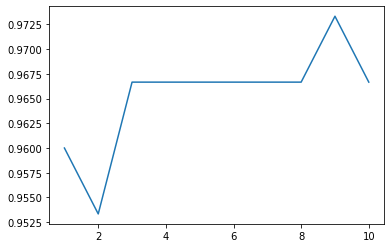

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)

In [ ]:
type(list(range(3)))

list

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors = list(range(1,31)),weights = ['uniform', 'distance'])
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
grid.best_estimator_

0.9800000000000001


KNeighborsClassifier(n_neighbors=13)

In [ ]:
data = pd.read_csv('jane_st.csv')
data

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,86,0.859516,-0.003656,-0.005449,-0.017403,-0.028896,-0.021435,1,3.151305,5.467693,...,NaN,2.433699,4.282284,1.621115,4.331030,2.553220,3.799011,2.642943,3.998054,527894
1,86,0.590949,0.000347,-0.000376,-0.004051,-0.007995,-0.004743,-1,-0.365888,0.824004,...,NaN,-0.702873,4.038753,-0.789767,4.133183,-1.207878,3.402796,-0.928290,3.511141,527896
2,86,0.172997,0.000168,0.000333,-0.002375,-0.003064,0.001527,1,1.514607,0.596214,...,NaN,2.304354,1.530169,3.596848,4.613493,4.516110,3.341374,2.635798,1.535235,527897
3,86,1.507813,0.001534,0.000481,-0.000082,-0.002271,-0.001663,-1,-1.008999,0.242132,...,NaN,-1.700655,-0.376747,-0.876730,1.645537,-1.318172,1.369452,-1.352577,0.733124,527900
4,86,5.554003,0.003948,0.005943,0.015943,0.025001,0.017121,-1,-0.391784,0.152261,...,NaN,-1.690686,1.656818,-1.213169,2.949877,-2.033542,2.248799,-1.838696,1.905638,527901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,119,3.187322,-0.003661,-0.000819,-0.007084,-0.010663,-0.004867,1,-0.168267,-0.476194,...,NaN,-0.771373,0.383570,-0.236107,2.447080,-0.347757,1.856241,-0.454407,1.268946,647778
99996,119,6.868221,0.000076,0.000565,0.002812,0.004723,0.002175,-1,1.812417,0.535283,...,NaN,0.795926,3.573583,0.622122,4.569409,0.865126,3.578019,0.620400,2.930556,647779
99997,119,0.247152,0.002486,0.005739,0.008324,0.008448,0.008701,-1,-3.172026,-3.093182,...,NaN,1.376779,2.306350,2.088929,5.032583,2.739466,3.811587,1.710580,2.432626,647780
99998,119,0.168480,0.001498,0.003790,0.002837,0.005823,0.007279,-1,0.062176,1.612372,...,NaN,3.108352,7.182014,2.629050,8.584357,3.800593,7.475327,3.680791,7.420677,647781


In [ ]:
z = data.drop(['resp','ts_id','resp_1'],axis='columns')
u = pd.Series([0 if row<0 else 1 for row in data.resp ])

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors = list(range(1,31)),weights = ['uniform', 'distance'])
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(z,u)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_score_

1.0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=493c38cf-6a88-4424-8f73-ba5136a7ea38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>